In [2]:
%matplotlib inline
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import files 
uploaded = files.upload()

Saving Week2_challenge_data_source.xlsx to Week2_challenge_data_source.xlsx


In [11]:
import io 
da = pd.read_excel(io.BytesIO(uploaded['Week2_challenge_data_source.xlsx'])) 
da.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [ ]:
da.count()

Bearer Id                                   150001
Start                                       150000
Start ms                                    150000
End                                         150000
End ms                                      150000
dur                                         150000
IMSI                                        149431
MSISDN/Number                               148935
IMEI                                        149429
Last Location Name                          148848
Avg RTT DL (ms)                             122172
Avg RTT UL (ms)                             122189
Avg Bearer TP DL (kbps)                     150000
Avg Bearer TP UL (kbps)                     150000
TCP DL Retrans. Vol (Bytes)                  61855
TCP UL Retrans. Vol (Bytes)                  53352
DL TP < 50 Kbps (%)                         149247
50 Kbps < DL TP < 250 Kbps (%)              149247
250 Kbps < DL TP < 1 Mbps (%)               149247
DL TP > 1 Mbps (%)             

##Function for defining the upper and lower boundries

In [20]:
def normal_boundaries(da, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = da[variable].mean() + distance * da[variable].std()
    lower_boundary = da[variable].mean() - distance * da[variable].std()

    return upper_boundary, lower_boundary

#Number of xDR sessions

In [29]:
grouped_data= da.groupby('MSISDN/Number')
x= grouped_data.agg('Bearer Id')
x.count()

#grouped_data.count()

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
               ..
3.379000e+10    1
3.379000e+10    1
3.197021e+12    1
3.370000e+14    1
8.823971e+14    1
Name: Bearer Id, Length: 106856, dtype: int64

#Session duration

In [24]:
# Upper and lower limits of duration
dur_upper_limit, dur_lower_limit = normal_boundaries(da, 'Dur. (ms)', 1.5)
dur_upper_limit, dur_lower_limit

(183635.0640699022, 13492.705536156893)

In [28]:
# Replacing the outliers by the maximum and minimum limit

da['Dur. (ms)']= np.where(da['Dur. (ms)'] > dur_upper_limit, dur_upper_limit,
                       np.where(da['Dur. (ms)'] < dur_lower_limit, dur_lower_limit, da['Dur. (ms)']))

In [ ]:
# Session duration session for each customer
da.rename(columns = {'Dur. (ms).1':'dur'}, inplace = True)
X = grouped_data.agg({'dur': ['count','mean','median','std','' 'min', 'max','quantile']})
X.count()



dur  count       106856
     mean        106856
     median      106856
     std          29125
     min         106856
     max         106856
     quantile    106856
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48aafee390>]],
      dtype=object)

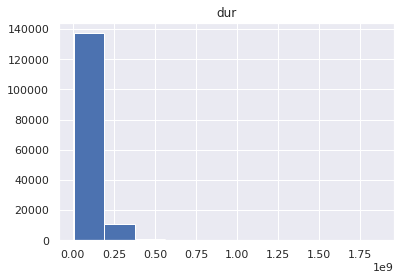

In [ ]:
da.hist(column='dur')

# The total download (DL) and upload (UL) data

In [ ]:
TD= da['Total_data'] = da['Total UL (Bytes)'] + da['Total DL (Bytes)']
TD.describe()

count    1.500000e+05
mean     4.957646e+08
std      2.443818e+08
min      2.895611e+07
25%      2.844759e+08
50%      4.968611e+08
75%      7.065059e+08
max      9.559848e+08
dtype: float64

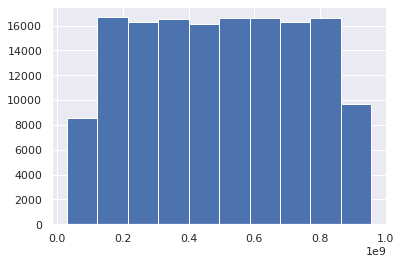

In [ ]:
TD.hist()

##Top 3 handsets manufactorers

In [38]:
grouped_by_Handset_manufactuter = da.groupby('Handset Manufacturer').sum().reset_index()
g= grouped_by_Handset_manufactuter.sort_values('Handset Manufacturer', ascending=False)
x= g.head(3)
x['Handset Manufacturer']

169                    undefined
168    Zyxel Communications Corp
167    ZyXEL Communications Corp
Name: Handset Manufacturer, dtype: object

##Top 10 handsets used by the customers

In [39]:
grouped_by_handset_type = da.groupby('Handset Type').sum().reset_index()
g= grouped_by_handset_type.sort_values('Handset Type', ascending=False)
x= g.head(10)
x['Handset Type']


1395                                            undefined
1394                      Zyxel Communicat. Zyxel Wah7706
1393                            Zyxel Communicat. Sbg3600
1392                            Zyxel Communicat. Lte7460
1391    Zte Zte Blade C2 Smartphone Android By Sfr Sta...
1390                                 Zte Starxtrem By Sfr
1389    Zte Racer Iii Mini Zte Switch X1 Bouygues Tele...
1388                                            Zte Mf626
1387                                            Zte Mf259
1386                                            Zte Mf190
Name: Handset Type, dtype: object

In [ ]:
x= da.groupby(['MSISDN/Number']).agg({'Email UL (Bytes)':'sum','Email DL (Bytes)':'sum'})
x

,Email UL (Bytes),Email DL (Bytes)
MSISDN/Number,,
3.360100e+10,493962.0,837400.0
3.360100e+10,478960.0,2828821.0
3.360100e+10,768880.0,2436500.0
3.360101e+10,106052.0,2178618.0
3.360101e+10,1057661.0,2247808.0
...,...,...
3.379000e+10,525969.0,480946.0
3.379000e+10,664.0,2513433.0
3.197021e+12,678492.0,842279.0


##Total data volume (in Bytes) for Email

In [ ]:

TDE= da['Total_Email_data_volume'] = da['Email UL (Bytes)'] + da['Email DL (Bytes)']
TDE

0         3.701304e+06
1         9.373850e+05
2         3.363124e+06
3         2.070983e+06
4         2.110349e+06
              ...     
149996    6.908760e+05
149997    2.121718e+06
149998    2.058277e+06
149999    2.850914e+06
150000    2.259102e+06
Length: 150001, dtype: float64

In [ ]:
TDE.describe()

count    1.500010e+05
mean     2.259102e+06
std      1.071109e+06
min      8.359000e+03
25%      1.359344e+06
50%      2.263567e+06
75%      3.159818e+06
max      4.518036e+06
dtype: float64

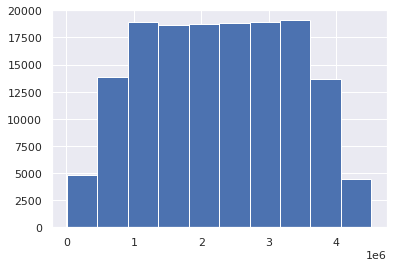

In [ ]:
TDE.hist()

##Total data volume (in Bytes) for Socal media

In [ ]:
TDS = da['Total_SocialMedia_data_volume']= da['Social Media DL (Bytes)'] + da['Social Media UL (Bytes)']
TDS 	

0         1.570185e+06
1         1.933278e+06
2         1.726277e+06
3         6.574930e+05
4         9.127880e+05
              ...     
149996    3.517065e+06
149997    2.352181e+06
149998    1.260239e+06
149999    8.231090e+05
150000    1.828250e+06
Length: 150001, dtype: float64

In [ ]:
TDS.describe()

count    1.500010e+05
mean     1.828250e+06
std      1.035646e+06
min      1.563000e+03
25%      9.322180e+05
50%      1.826471e+06
75%      2.727487e+06
max      3.650861e+06
dtype: float64

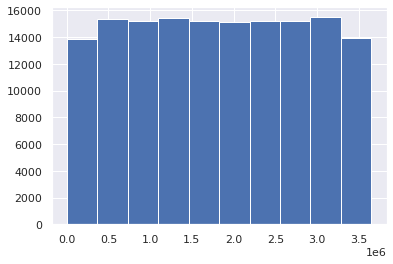

In [ ]:
TDS.hist()

##Total data volume (in Bytes) for Google

In [ ]:
TDG = da['Total_Google_data_volume']= da['Google DL (Bytes)'] + da['Google UL (Bytes)']
TDG	

0      5.049886e+07
1      1.435310e+08
2      1.167115e+08
3      7.388365e+06
4      1.385752e+07
           ...     
165    1.189907e+08
166    1.433153e+09
167    1.155967e+07
168    1.434483e+07
169    7.019873e+10
Length: 170, dtype: float64

In [ ]:
TDG.describe()

count    1.500010e+05
mean     4.303331e+08
std      2.440199e+08
min      3.063580e+05
25%      2.187279e+08
50%      4.316150e+08
75%      6.414159e+08
max      8.592028e+08
dtype: float64

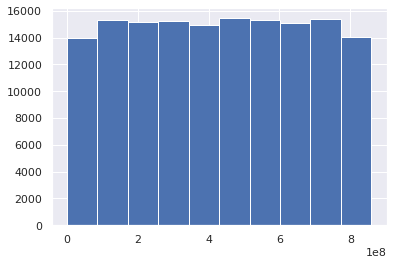

In [ ]:
TDG.hist()

##Total data volume (in Bytes) for YouTube

In [ ]:
TDY= da['Total_Youtube_data_volume'] = da['Youtube DL (Bytes)'] + da['Youtube UL (Bytes)']
TDY.describe()


0       2.425227e+07
1       1.819422e+07
2       3.844673e+07
3       1.683830e+07
4       2.228116e+07
            ...     
1391    5.406600e+07
1392    7.185668e+06
1393    3.533190e+07
1394    3.002830e+07
1395    2.035389e+11
Length: 1396, dtype: float64

In [ ]:
TDY.describe()

count    1.396000e+03
mean     2.423650e+09
std      1.809079e+10
min      8.773120e+05
25%      2.452676e+07
50%      5.194677e+07
75%      1.788070e+08
max      4.480679e+11
dtype: float64

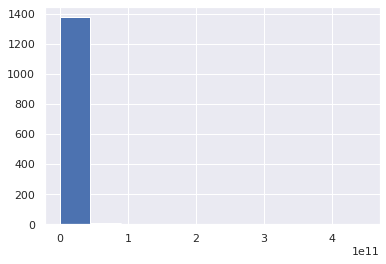

In [ ]:
TDY.hist()

##Total data volume (in Bytes) for Netflix

In [ ]:
TDN= da['Total_Netflix_data_volume'] = da['Netflix DL (Bytes)'] + da['Netflix UL (Bytes)']
TDN

0       2.041572e+07
1       2.702036e+07
2       1.809866e+07
3       3.253186e+07
4       1.161676e+07
            ...     
1391    5.038648e+07
1392    1.374968e+07
1393    3.809707e+07
1394    2.506138e+07
1395    2.035855e+11
Length: 1396, dtype: float64

In [ ]:
TDN.describe()

count    1.396000e+03
mean     2.422031e+09
std      1.803378e+10
min      1.354141e+06
25%      2.423216e+07
50%      5.070819e+07
75%      1.816914e+08
max      4.457561e+11
dtype: float64

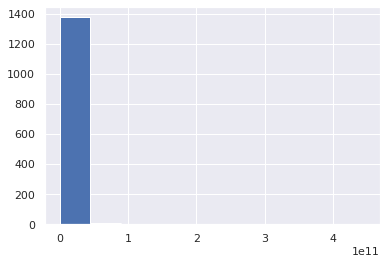

In [ ]:
TDN.hist()

In [ ]:
TDG= da['Total_Gaming_data_volume'] = da['Gaming DL (Bytes)'] + da['Gaming UL (Bytes)']
TDG

0         2.924265e+08
1         6.099208e+08
2         2.299803e+08
3         8.103879e+08
4         5.312370e+08
              ...     
149996    5.358069e+08
149997    6.316281e+08
149998    5.669338e+08
149999    3.550664e+08
150000    4.303331e+08
Length: 150001, dtype: float64

In [ ]:
TDG.describe()

count    1.500010e+05
mean     4.303331e+08
std      2.440199e+08
min      3.063580e+05
25%      2.187279e+08
50%      4.316150e+08
75%      6.414159e+08
max      8.592028e+08
dtype: float64

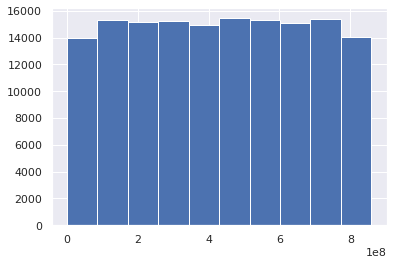

In [ ]:
TDG.hist()